### Practice Project - 6

# Glass Identification Dataset
Problem Statement:

The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!


The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

    Id number: 1 to 214
    RI: refractive index
    Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
    Mg: Magnesium
    Al: Aluminum
    Si: Silicon
    K: Potassium
    Ca: Calcium
    Ba: Barium
    Fe: Iron
    Type of glass: (class attribute)

    1- building_windows_float_processed
    2- building_windows_non_float_processed
    3- vehicle_windows_float_processed
    4- vehicle_windows_non_float_processed (none in this database)
    5- containers
    6- tableware
    7- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

Predict : Type of glass
Downlaod Files:

    https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
    https://github.com/dsrscientist/dataset3

# Importing Liabraries

In [1]:
# Importing required liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Convering data to DataFrame
data = pd.read_csv ('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
data

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


### Column names are missing in our data, need to add column names to our data, need to add all column names

In [3]:
data.columns = ['Id','RI', 'Na', 'Mg', 'Al','Si','K', 'Ca', 'Ba', 'Fe', 'Type'] 

### Need to add first row again as it was missing after adding columns

In [4]:
# Creating new DataFrame for deleted column

df = pd.DataFrame ({'Id':[1],'RI':[1.52101], 'Na':[13.64], 'Mg':[4.49], 'Al':[1.10],'Si':[71.78],'K':[0.06], 'Ca':[8.75], 'Ba':[0.00], 'Fe':[0.00], 'Type':[1]})

In [5]:
# Appending new Data with previous one

data = data.append(df, ignore_index = True)
data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
212,214,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7


In [6]:
# Checking data info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [7]:
# Checking other statistical information of our data

data.describe ()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
# How data is ok, further need to remove columns which are not required

glass = data.drop (columns='Id', axis = 1)
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7
212,1.51711,14.23,0.00,2.08,73.36,0.00,8.62,1.67,0.00,7


### There are now 214 rows and 10 columns in our new data

In [9]:
glass.shape

(214, 10)

In [10]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type']

X = data[features]

Y = data[label]


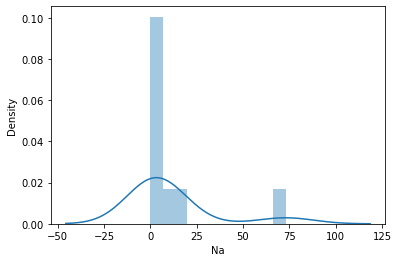

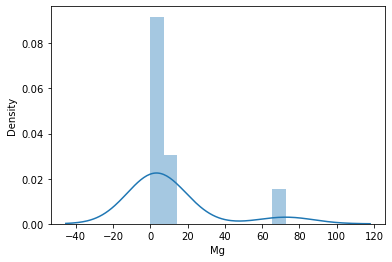

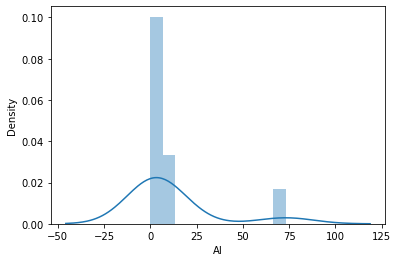

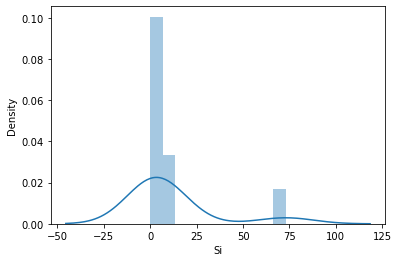

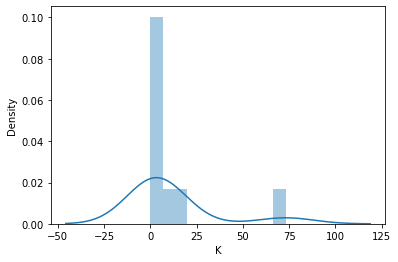

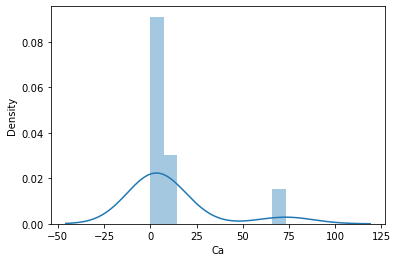

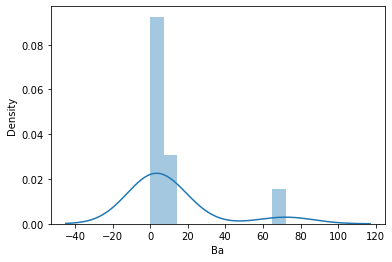

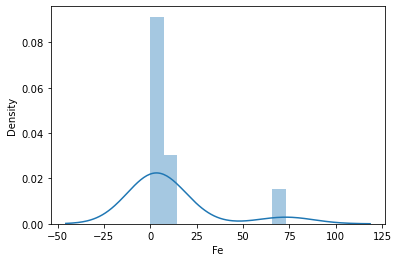

In [11]:
x2 = X.values
from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
    sns.distplot(x2[i])
    plt.xlabel(features[i])
    plt.show()

### Above diagrams shows that our dataset is skewed either on positive side or negative side and that the data is not normalized.
1. There is correction need to our data.
2. Further need to check data in pairplot

<Figure size 576x576 with 0 Axes>

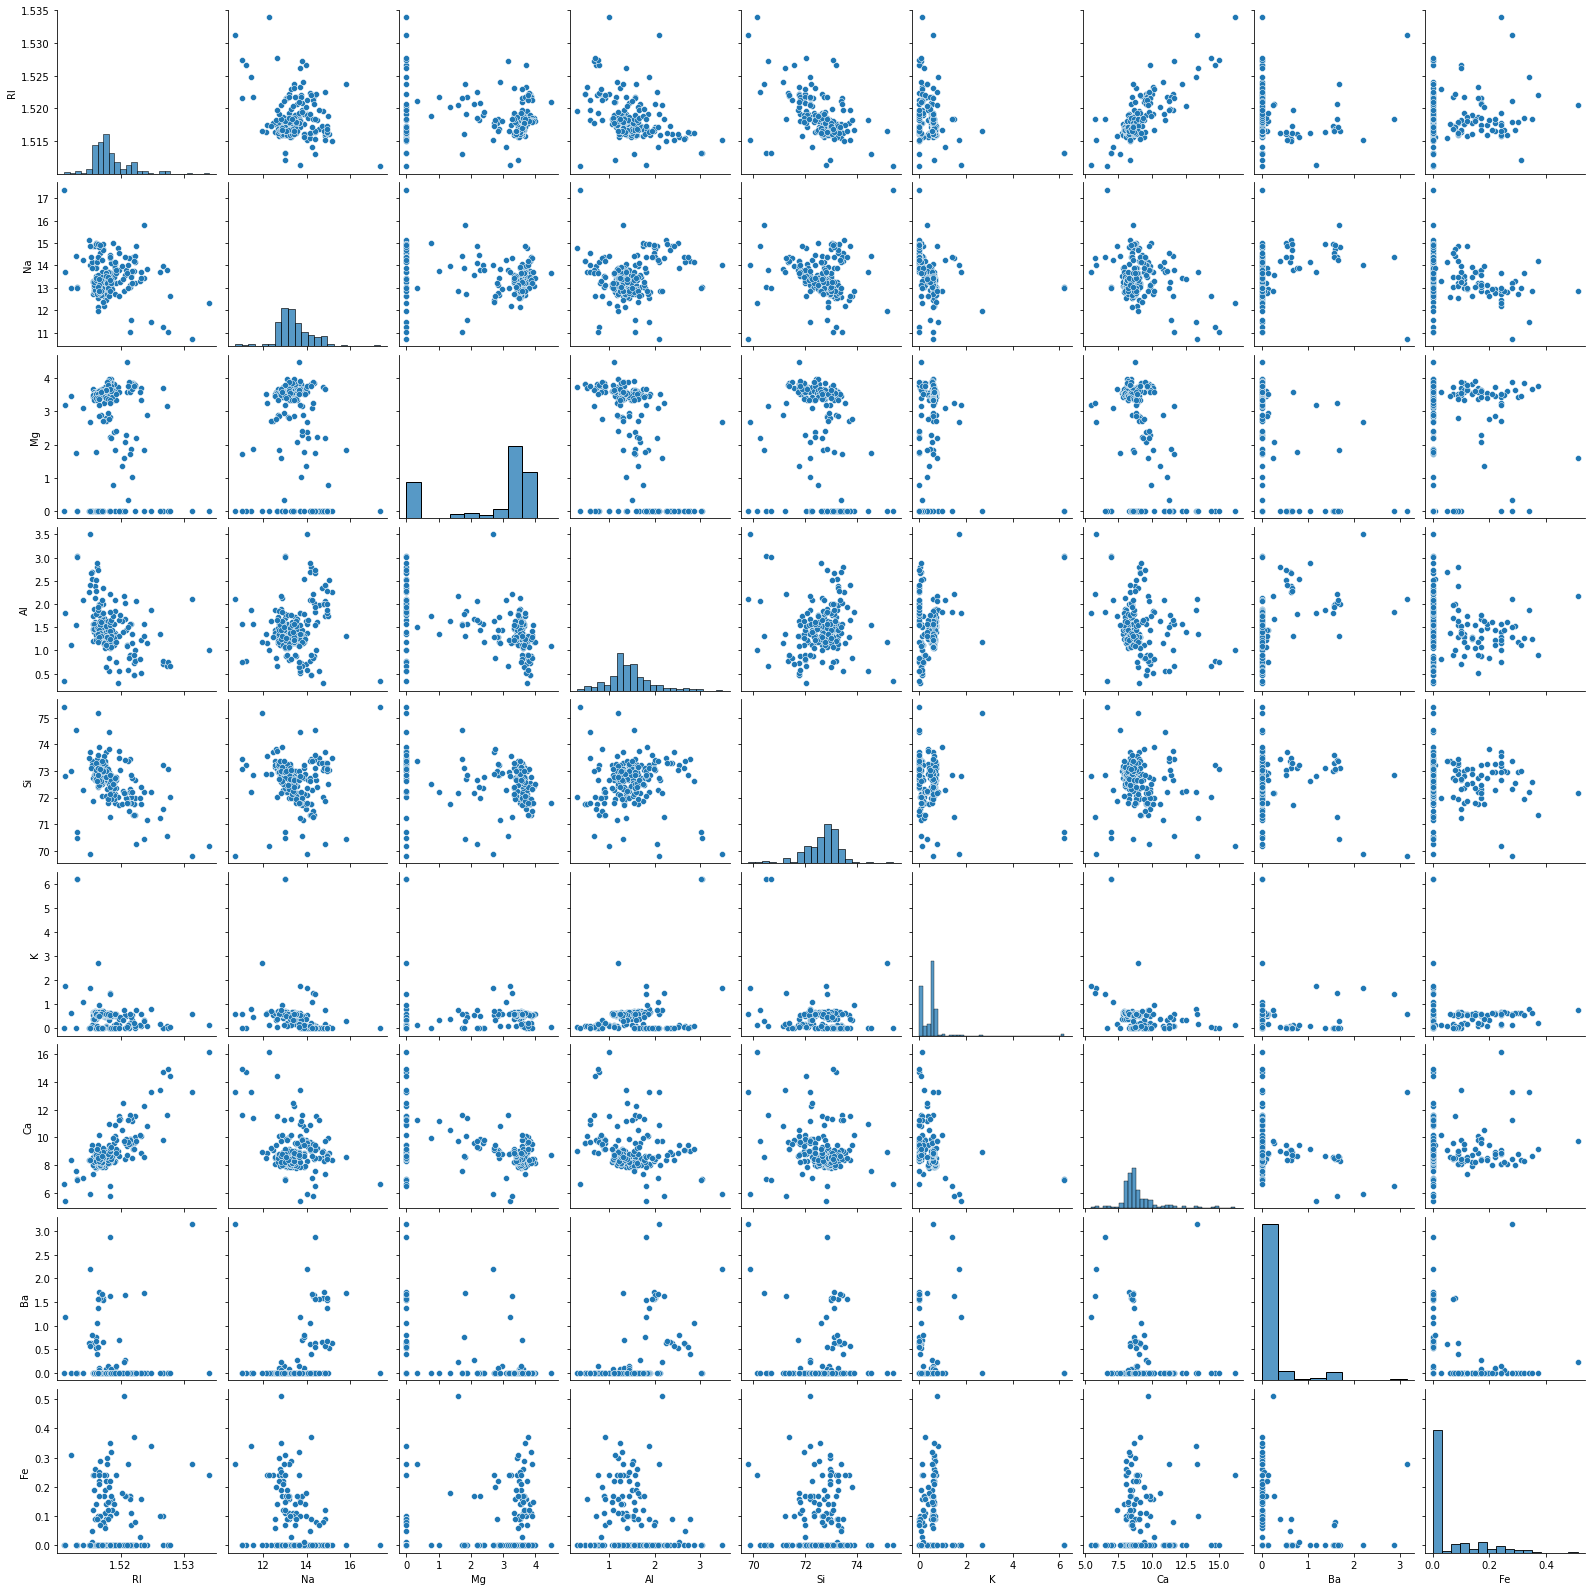

In [12]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

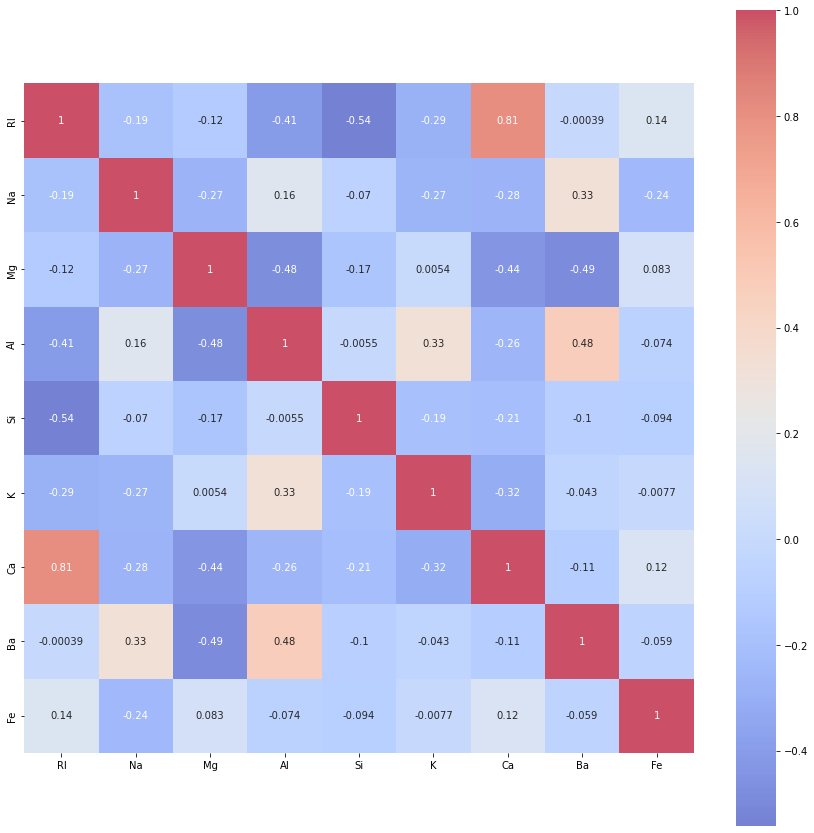

In [13]:
## Checking Corelation of features

correlation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation,cbar=True,square=True,annot = True , yticklabels=features,xticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Above Diagram shows correlation between different features of the dataset. Conclusion:

    Rl and Ca have strong correlation between each other
    Al and Ba have intermediate correlation between each other


### Normalizing the data

In [14]:
scaler = MinMaxScaler()


In [15]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00
1,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00
2,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00
3,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00
4,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26


In [16]:
X=preprocessing.scale(X)

### We have now processed our data using Sk learan scaler
### Now further need to check and visualize our data

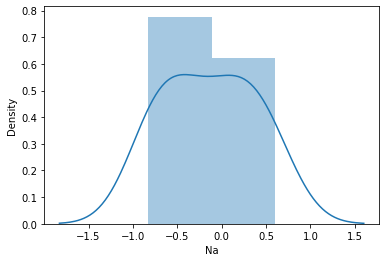

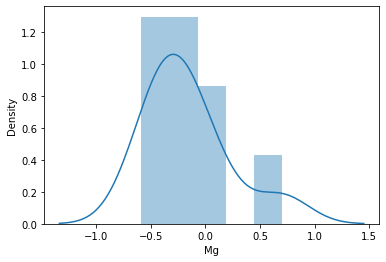

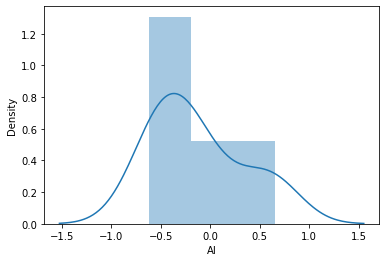

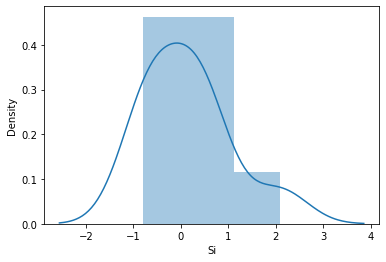

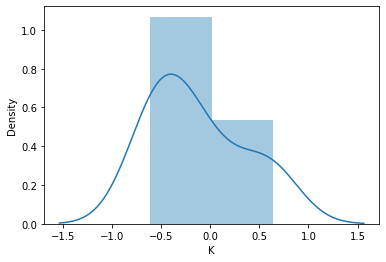

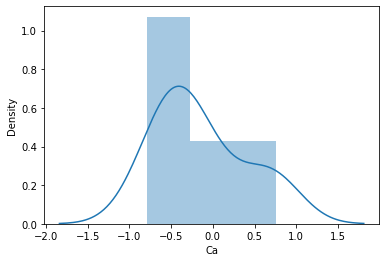

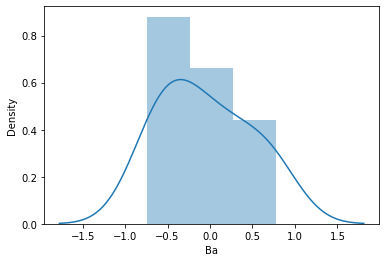

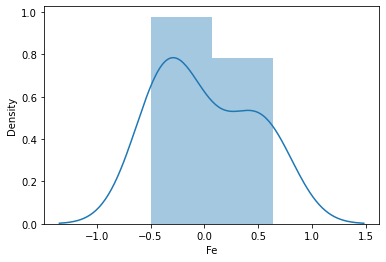

In [17]:
x2 = X

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()


### Above diagrams shows that after data preprocessing, the skewness is reduced and data is more normalized and looking little good further we can start with Train_Test_Split

## Lets begin with training and test of data using various methods

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size=0.20, random_state=3)

We have taken 20% data as test data, as our model has pretty much values, it think 20% will be good pick

In [19]:
# checking how much data is splited in train and test\

Y_train = Y_train.values.ravel()
Y_test = Y_test.values.ravel()

In [20]:
# checking how much data is splited in train and test\


print('Shape of X_train = ' , str(X_train.shape))
print('Shape of X_test = ' ,str(X_test.shape))
print('Shape of Y_train = ' , str(Y_train.shape))
print('Shape of Y_test = ' ,str(Y_test.shape))

Shape of X_train =  (171, 9)
Shape of X_test =  (43, 9)
Shape of Y_train =  (171,)
Shape of Y_test =  (43,)


## Random Forrest

In [21]:
# Model Training (Random forest)
model = RandomForestClassifier ()
model.fit (X_train, Y_train)

RandomForestClassifier()

In [22]:
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score (X_train_prediction, Y_train)
print ('Accuracy = ', train_data_accuracy)

Accuracy =  1.0


In [23]:
# Model evaluation on our test data
# accurary on test date

X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score (X_test_prediction, Y_test)
print ('Accuracy = ', test_data_accuracy)

Accuracy =  0.7674418604651163


## Linear Regression

In [24]:
regressor = LinearRegression ()

In [25]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [26]:
training_data_prediction = regressor.predict(X_train)

In [27]:
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print ('R Squared value: ', r2_train)

R Squared value:  0.7619144430045353


## Logestic Regression

In [28]:
model = LogisticRegression()

In [29]:
model.fit(X_train, Y_train)

LogisticRegression()

In [30]:
X_train_prediction = model.predict(X_train)
print (X_train_prediction)

[1 7 1 1 1 7 5 1 2 1 2 2 7 1 1 1 2 2 2 2 6 1 1 2 1 2 2 1 1 1 2 1 1 1 2 1 7
 1 7 2 2 2 2 1 1 2 1 2 1 1 7 1 1 2 1 1 2 1 7 6 5 6 2 1 1 7 6 7 1 2 1 2 2 2
 1 2 2 2 1 2 7 1 1 2 2 3 2 2 1 1 6 1 2 7 2 1 7 1 7 2 2 2 2 1 2 2 1 1 2 2 2
 2 2 1 2 1 2 2 2 7 2 7 1 2 7 1 2 1 1 2 1 1 5 2 1 7 1 2 2 5 2 2 2 6 2 1 1 1
 1 1 1 2 5 2 5 2 5 1 2 2 5 6 7 2 1 1 5 7 1 1 2]


In [31]:
# checking accuracy of our training data

training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print ('Accuracy Score of Training Data = ', training_data_accuracy)

Accuracy Score of Training Data =  0.695906432748538


In [32]:
# Accuracy Test
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

[1 2 2 6 2 7 7 1 1 7 2 2 1 1 2 5 2 7 7 2 7 1 7 1 1 1 7 1 1 2 1 1 5 2 1 1 2
 2 5 1 7 1 2]


In [33]:
test_data_accuracy = accuracy_score (Y_test, X_test_prediction)
print ('Accuracy score of test data = ', test_data_accuracy)

Accuracy score of test data =  0.6046511627906976


In [34]:
input_data = (1.51766,13.21,3.69,1.29,72.61,0.57,8.22,.00,0.00)


# changing the input data to a numpy arrary

input_data_as_numpy_array = np.asarray(input_data)

# reshaping the data as we are prediting the lable for only one instance

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict (input_data_reshaped)
print (prediction)


if prediction == 1<4:
    print ('It is Window Glass')
else:
    print ('It is Non Window Glass')

[6]
It is Non Window Glass


With this we have create model which predits glass type with more than 99% accurary